<a href="https://colab.research.google.com/github/juanfelipe04/CIP/blob/main/Code_in_Place_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIP Project: A Multivariate Regression Analysis

## Taking a database that collects information on three different species of penguins across three distinct islands, we will perform a comprehensive statistical analysis leveraging various Python libraries. The objective is to explore, preprocess, and model the data to ultimately construct a multivariate regression model capable of predicting a numerical outcome based on several explanatory variables.

## To achieve this, we will use the following tools:
	•	pandas for data manipulation and cleaning.
	•	numpy for numerical computations and array operations.
	•	seaborn and matplotlib.pyplot for visual exploratory data analysis (EDA), including pairplots, histograms, and correlation heatmaps.
	•	scipy.stats for conducting preliminary statistical testing and understanding variable relationships.
	•	statsmodels.api and statsmodels.formula.api to build and interpret multivariate linear regression models using a formula-based syntax.
	•	sklearn.metrics for evaluating the performance of the regression model through metrics such as R².

(Optional libraries that may be used for reproducibility and data enhancement include:
	•	janitor for additional data cleaning operations,
	•	empiricaldist for empirical distribution visualization

## This pipeline will include:
	1.	Importing and exploring the dataset.
	2.	Cleaning missing values and recoding categorical variables.
	3.	Conducting visual and statistical exploratory data analysis.
	4.	Selecting features for the regression model.
	5.	Fitting a multiple linear regression model.
	6.	Assessing model assumptions and performance.

## This methodological approach ensures that the final model is statistically sound, interpretable, and supported by a thorough understanding of the underlying data structure.

# Install Necessary Libraries

In [ ]:
#!pip install --upgrade pip
#!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
#!pip install pyjanitor==0.23.1
#!pip install empiricaldist==0.6.7

# Import Libreries

In [ ]:
#import empiricaldist
#import janitor
import matplotlib.pyplot as plt
import numpy as np
#import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
#import session_info

## Graphics Appareance



In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff',
    'Torgersen': '#ff6602ff', # Added color for Torgersen
    'Biscoe': '#0f7175ff',    # Added color for Biscoe
    'Dream': '#c65dc9ff'      # Added color for Dream
}

# Import the Dataset

In [ ]:
#Crear la ruta
path = '/content/penguins.csv'
penguins_df = pd.read_csv(path,delimiter=',') #es bueno usar el delimitador para que me lo lea bien
penguins_df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## What type of data does the dataset have?

In [ ]:
penguins_df.dtypes

,0
rowid,int64
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


## How many variables of each data type do we have in the data set?

In [ ]:
penguins_df.dtypes.value_counts()

,count
float64,4
object,3
int64,2


## How many variables and observations do we have in the data set?

In [ ]:
penguins_df.shape

(344, 9)

## Are there explicit null values in the data set?

In [ ]:
penguins_df.isnull().any()

,0
rowid,False
species,False
island,False
bill_length_mm,True
bill_depth_mm,True
flipper_length_mm,True
body_mass_g,True
sex,True
year,False


## If we have observations with null values, how many do we have for each variable?

In [ ]:
penguins_df.isnull().sum()

,0
rowid,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


## What is the proportion of null values for each variable?

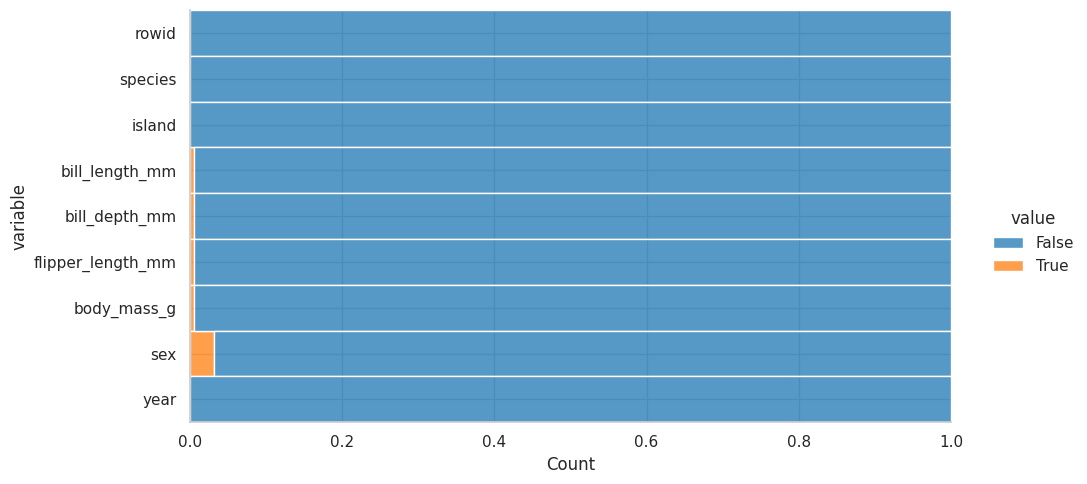

In [ ]:
penguins_df.isnull().melt().pipe(lambda df:(sns.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2)))

## We eliminate missing values

In [ ]:
processed_penguins_df = penguins_df.dropna()

In [ ]:
processed_penguins_df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## We review all variables

In [ ]:
processed_penguins_df.describe(include = 'all')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,174.324324,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,98.386547,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,90.000000,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,173.000000,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,259.000000,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


## Penguin count by species

<ipython-input-15-2621436700>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = processed_penguins_df, x = 'species', kind = 'count', palette=penguin_color)


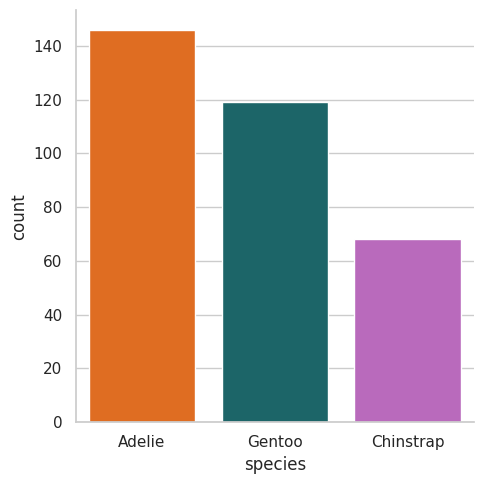

In [ ]:
sns.catplot(data = processed_penguins_df, x = 'species', kind = 'count', palette=penguin_color)

##  Mean or Average

In [ ]:
processed_penguins_df.mean(numeric_only= True)

,0
rowid,174.324324
bill_length_mm,43.992793
bill_depth_mm,17.164865
flipper_length_mm,200.966967
body_mass_g,4207.057057
year,2008.042042


In [ ]:
processed_penguins_df.describe(include = object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## Maximum values of the variables

In [ ]:
processed_penguins_df.max(numeric_only= True)

,0
rowid,344.0
bill_length_mm,59.6
bill_depth_mm,21.5
flipper_length_mm,231.0
body_mass_g,6300.0
year,2009.0


## Minimum values of the variables

In [ ]:
processed_penguins_df.min(numeric_only= True)

,0
rowid,1.0
bill_length_mm,32.1
bill_depth_mm,13.1
flipper_length_mm,172.0
body_mass_g,2700.0
year,2007.0


## Distribution of variables of interest

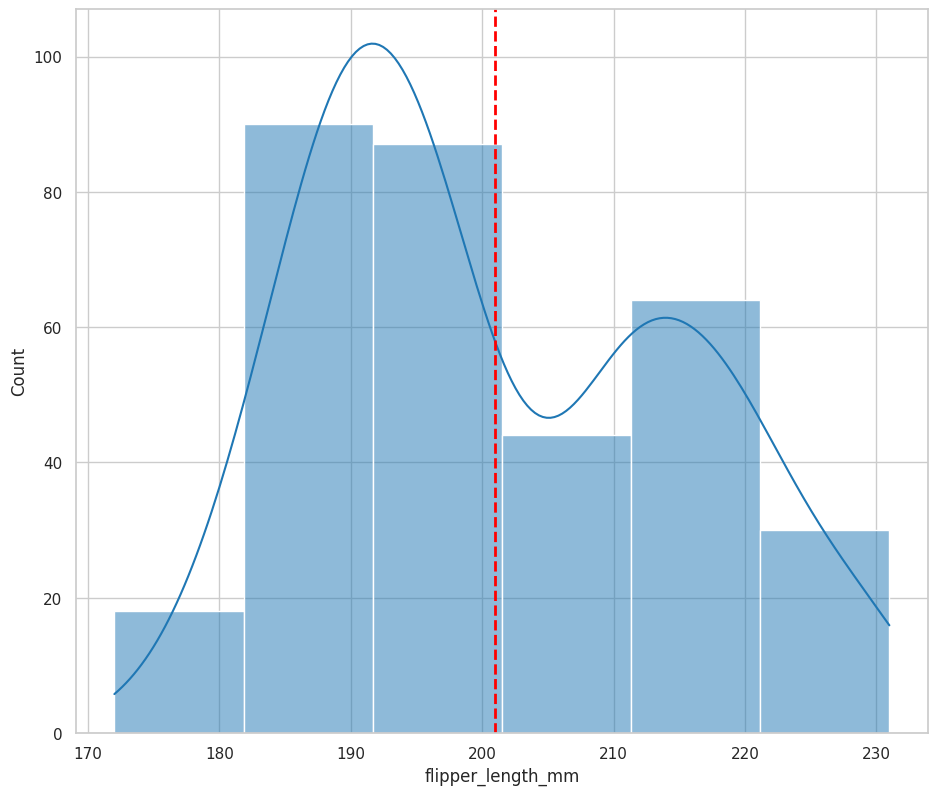

In [ ]:
sns.histplot(data = processed_penguins_df, x = 'flipper_length_mm', kde = True, binwidth = 10)

plt.axvline(x=processed_penguins_df.flipper_length_mm.mean(), color='red', linestyle='dashed', linewidth=2)

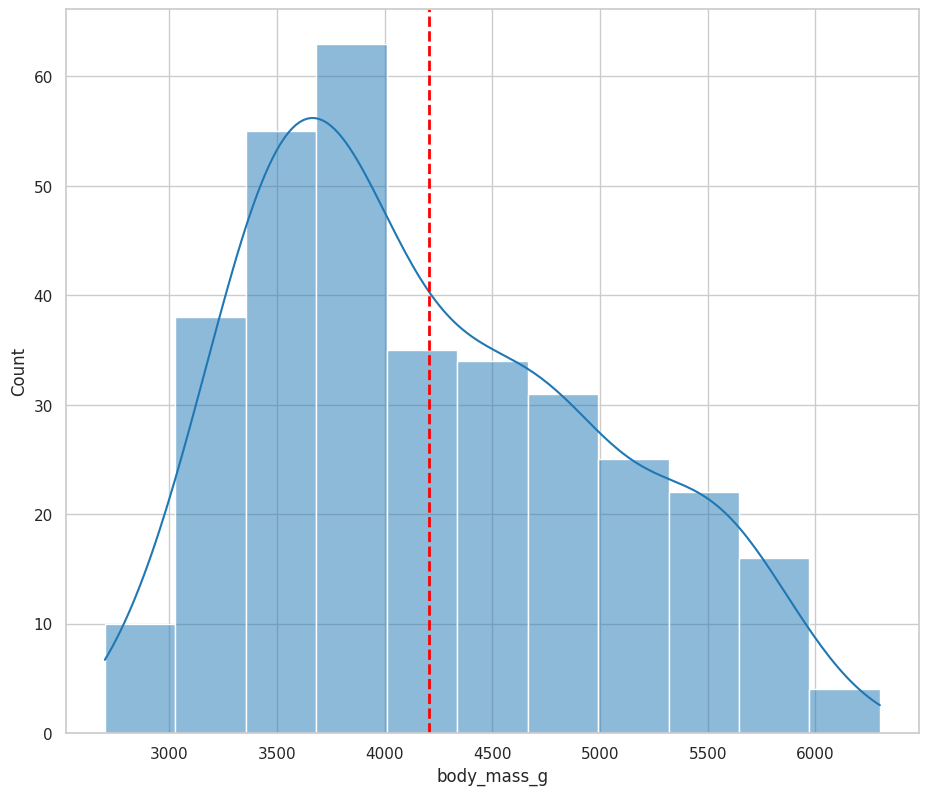

In [ ]:
sns.histplot(data = processed_penguins_df, x = 'body_mass_g', kde = True)

plt.axvline(x=processed_penguins_df.body_mass_g.mean(), color='red', linestyle='dashed', linewidth=2)

## Boxplot

<Axes: xlabel='flipper_length_mm'>

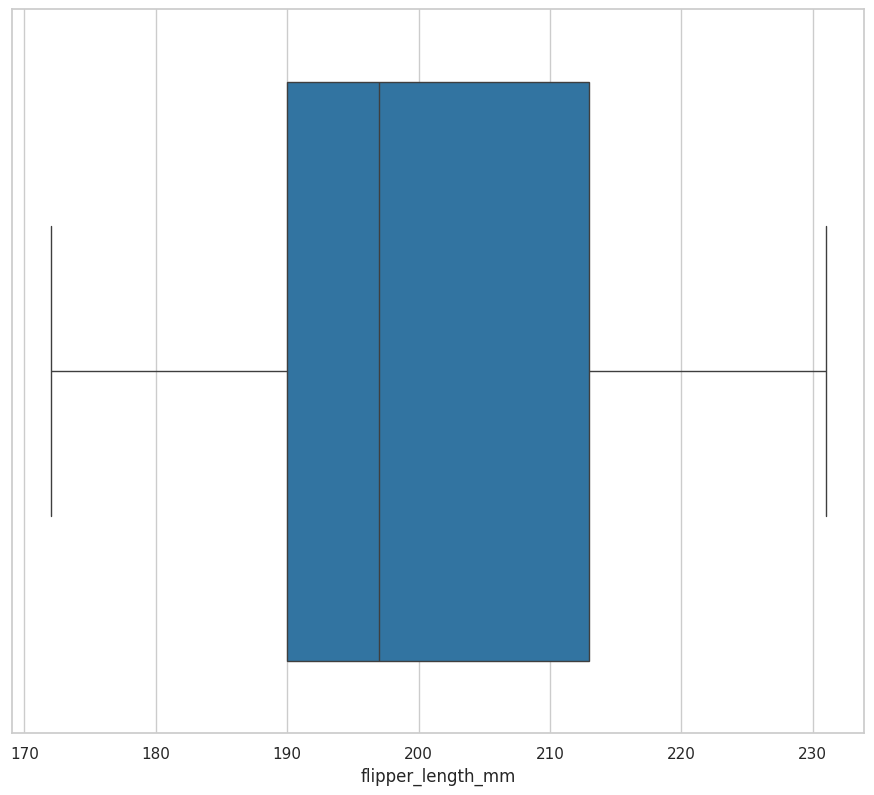

In [ ]:
sns.boxplot(data = processed_penguins_df, x = 'flipper_length_mm')

<Axes: xlabel='body_mass_g'>

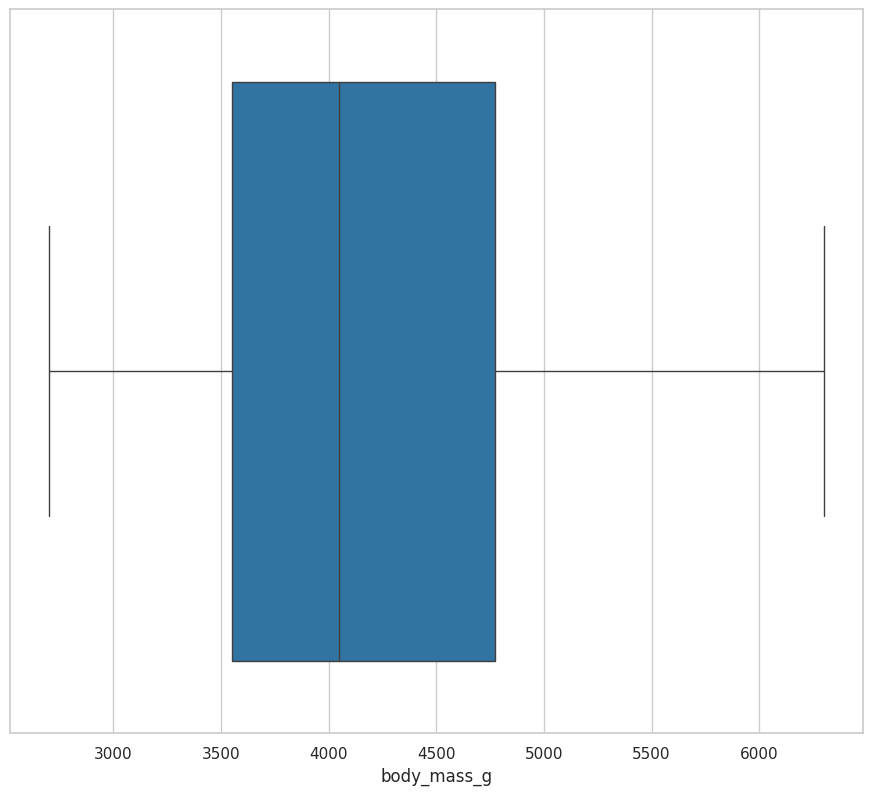

In [ ]:
sns.boxplot(data = processed_penguins_df, x = 'body_mass_g')

## Comparing distributions

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

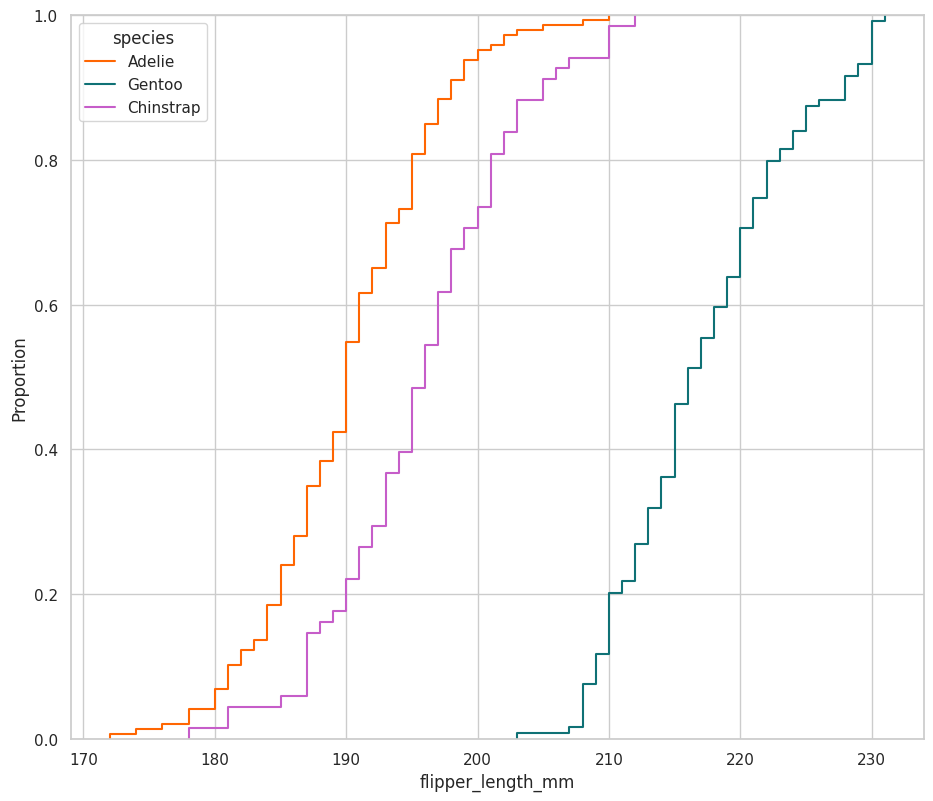

In [ ]:
sns.ecdfplot(data = processed_penguins_df, x = 'flipper_length_mm', hue = 'species', palette = penguin_color)

## Probability density functions

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

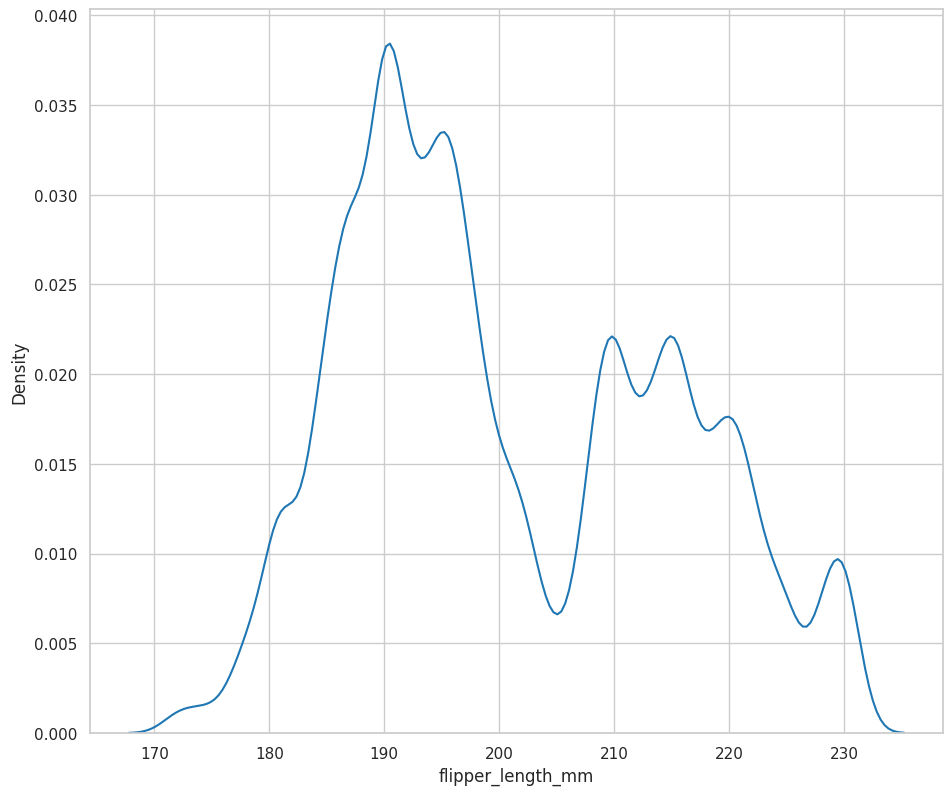

In [ ]:
sns.kdeplot(data = processed_penguins_df, x = 'flipper_length_mm', bw_method = 0.1)

In [ ]:
stats = processed_penguins_df.body_mass_g.describe()
stats

,body_mass_g
count,333.000000
mean,4207.057057
std,805.215802
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4775.000000
max,6300.000000


<Axes: xlabel='body_mass_g', ylabel='Density'>

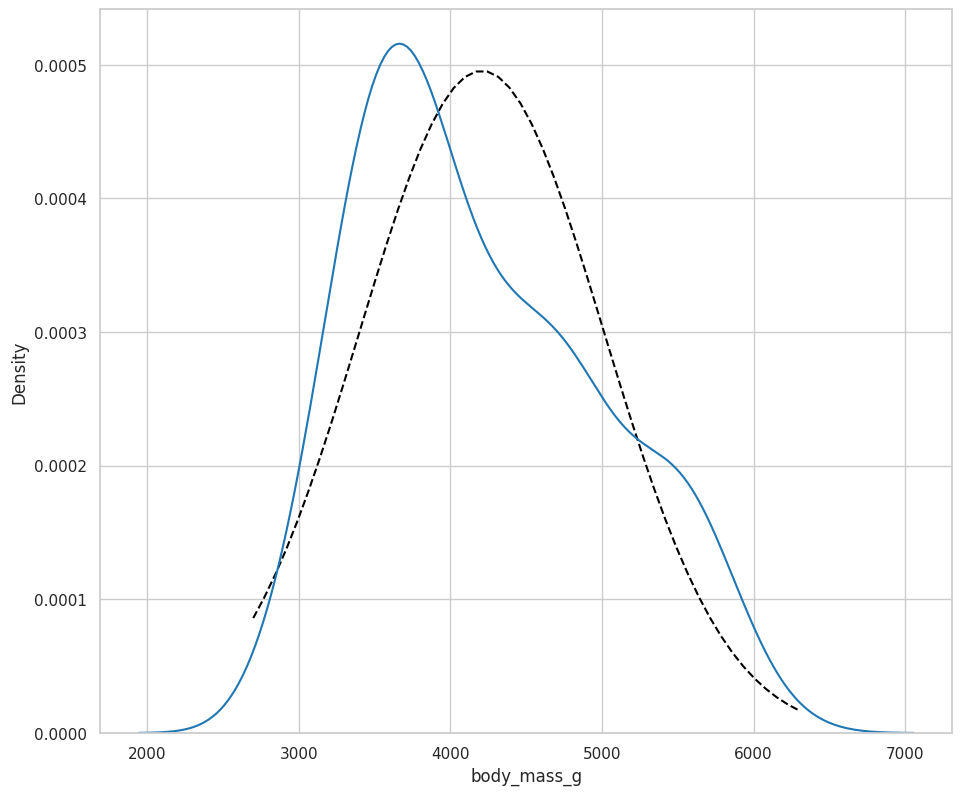

In [ ]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

sns.kdeplot(data = processed_penguins_df, x = 'body_mass_g')

## We will give value 0 to female and 1 to male.

In [ ]:
sex_numeric = processed_penguins_df.sex.replace({'MALE': 1, 'FEMALE': 0})
sex_numeric

,sex
0,male
1,female
2,female
4,female
5,male
...,...
339,male
340,female
341,male
342,male


## Scatter plots

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

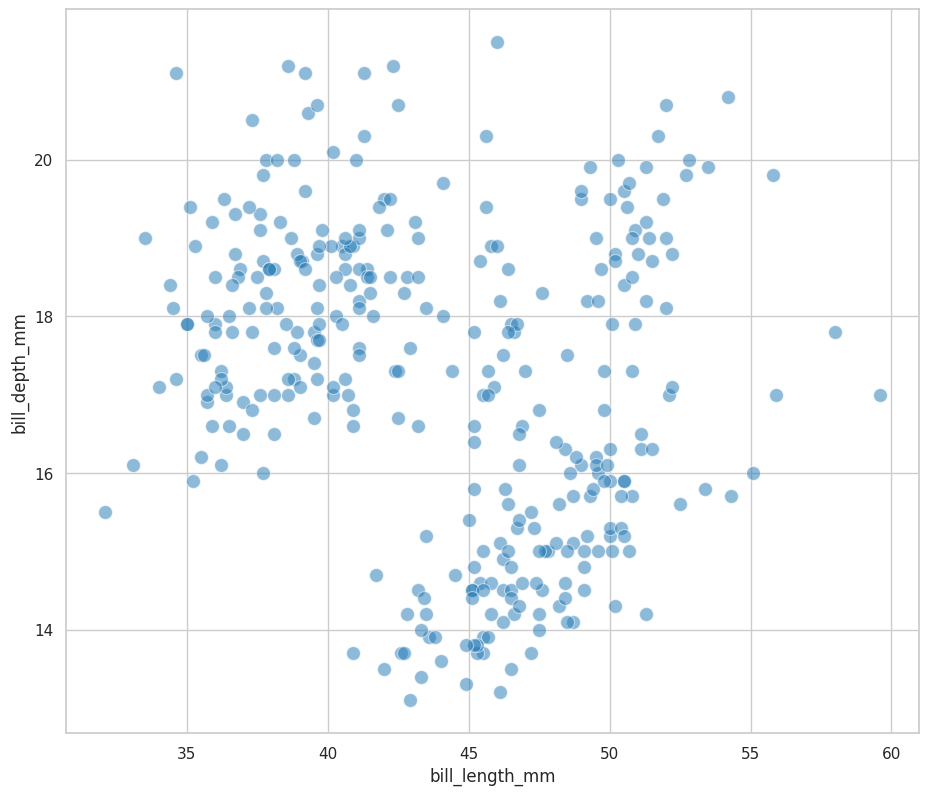

In [ ]:
sns.scatterplot(data = processed_penguins_df, x = 'bill_length_mm', y = 'bill_depth_mm', alpha = 0.5, s = 100)

## Boxplots and using noise in graphics

<Axes: xlabel='species', ylabel='flipper_length_mm'>

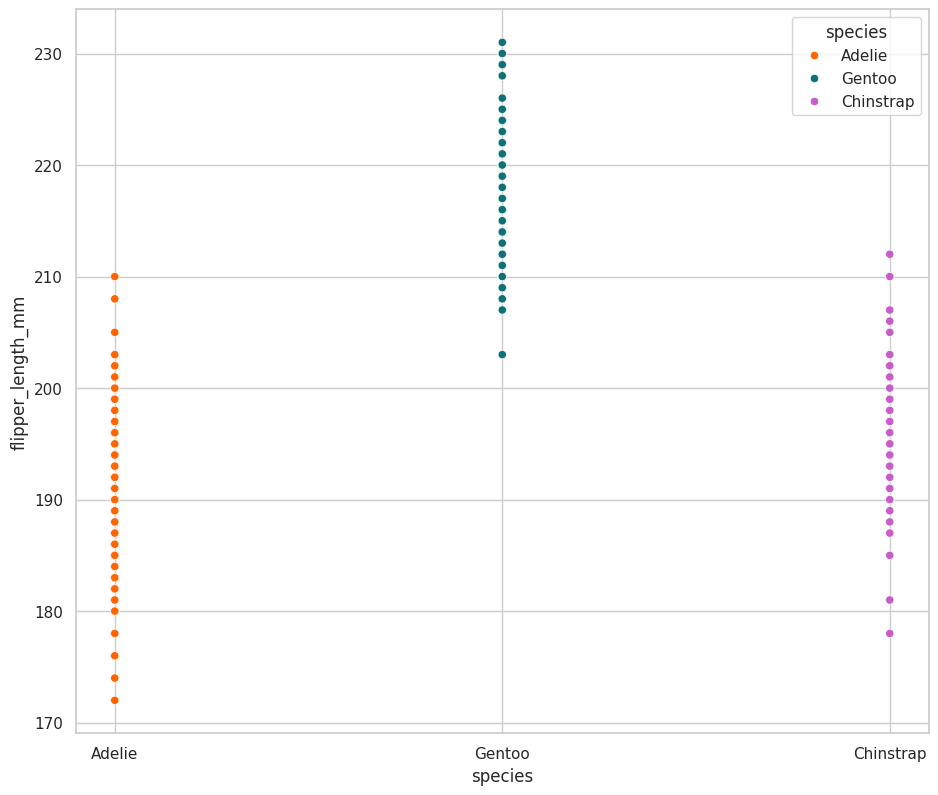

In [ ]:
sns.scatterplot(data = processed_penguins_df, x = 'species', y = 'flipper_length_mm', hue = 'species', palette = penguin_color)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

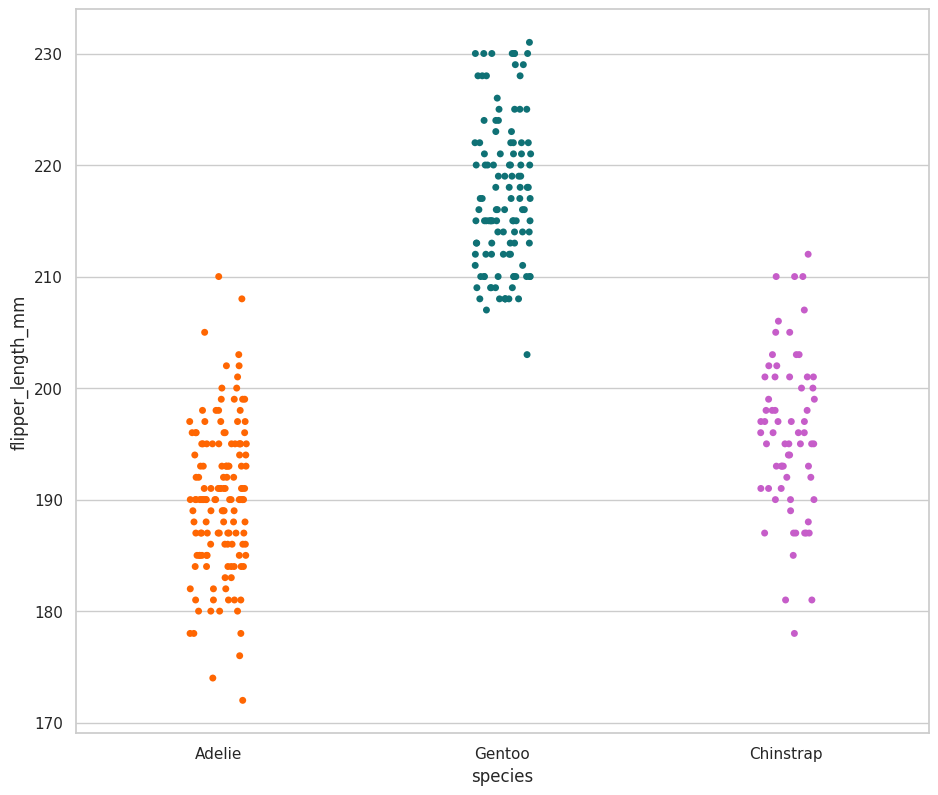

In [ ]:
sns.stripplot(data = processed_penguins_df, x = 'species', y = 'flipper_length_mm', hue = 'species', palette = penguin_color)

<Axes: xlabel='island', ylabel='body_mass_g'>

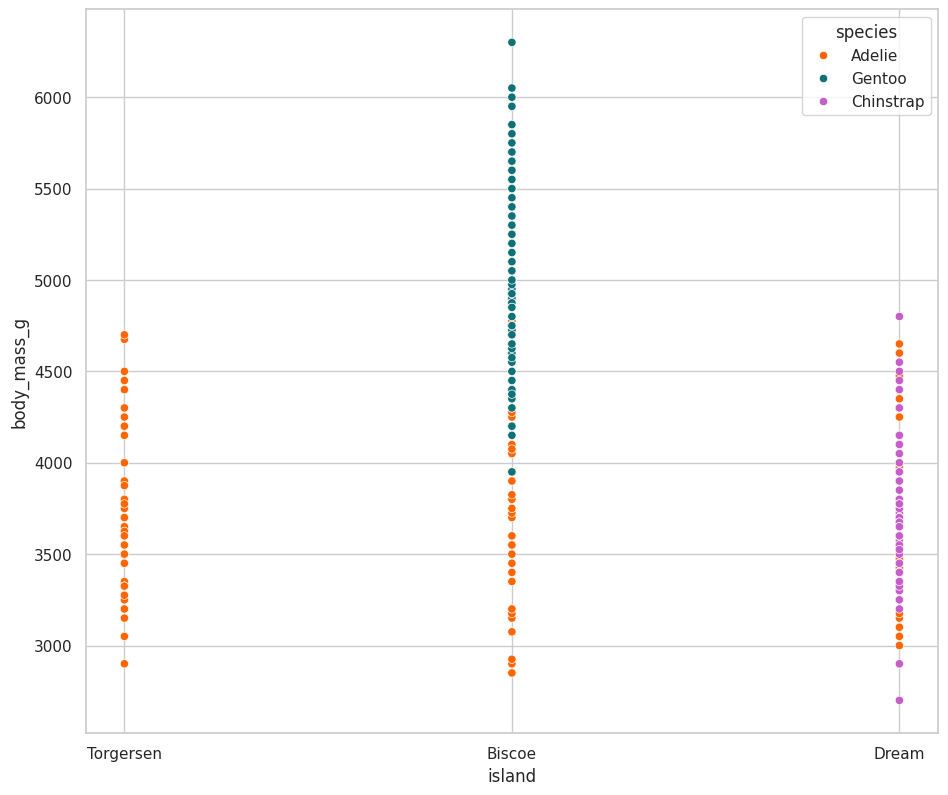

In [ ]:
sns.scatterplot(data = processed_penguins_df, x = 'island', y = 'body_mass_g', hue = 'species', palette = penguin_color)

## Correlation matrices

In [ ]:
processed_penguins_df.corr(numeric_only=True)

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
rowid,1.000000,0.762777,-0.247025,0.439969,0.260407,0.309760
bill_length_mm,0.762777,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.247025,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.439969,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.260407,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.309760,0.032657,-0.048182,0.151068,0.021862,1.000000


<Axes: >

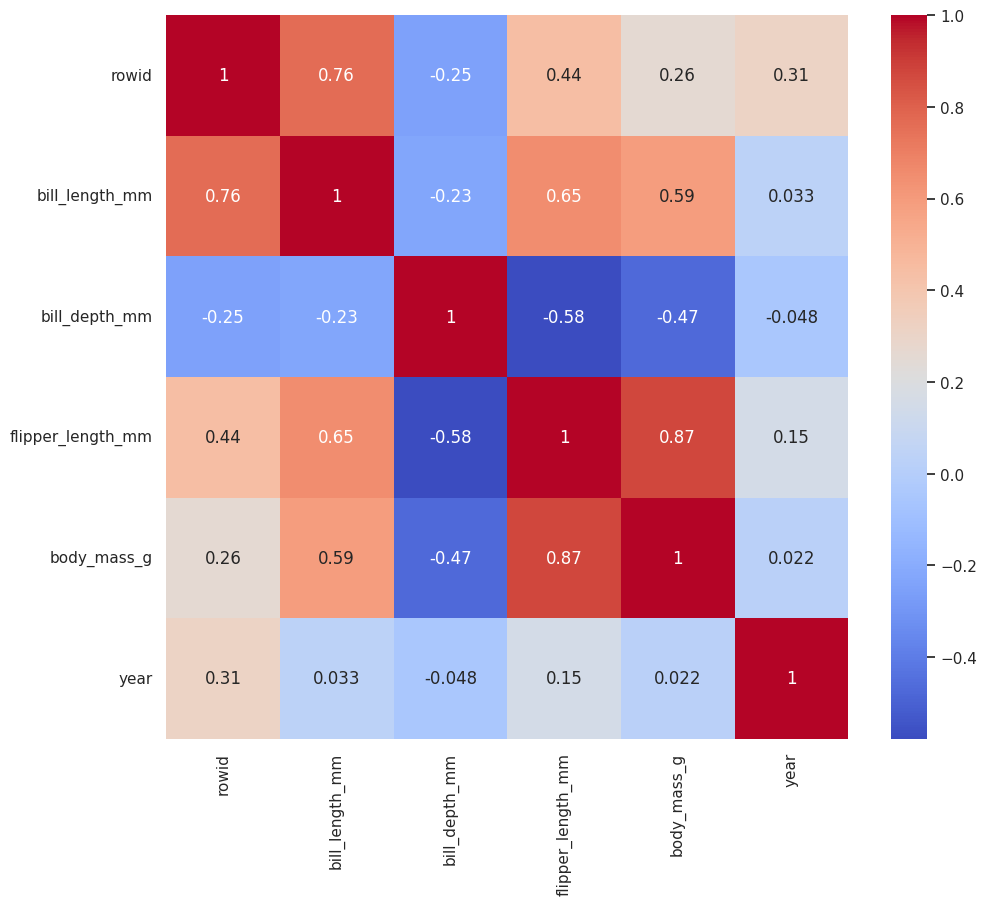

In [ ]:
sns.heatmap(data = processed_penguins_df.corr(numeric_only = True), cmap = 'coolwarm', annot = True)

In [ ]:
processed_penguins_df = processed_penguins_df.assign(numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0,1]))

<ipython-input-39-4228629895>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  processed_penguins_df = processed_penguins_df.assign(numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0,1]))


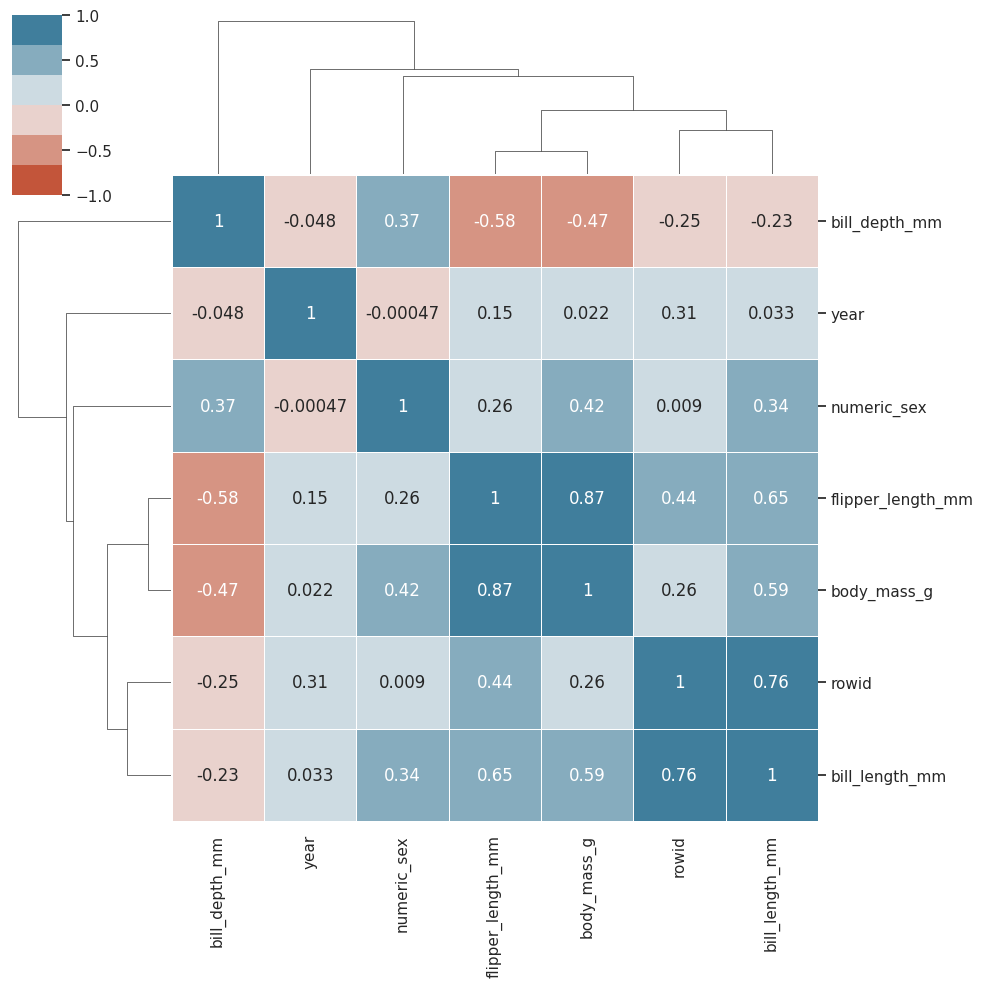

In [ ]:
sns.clustermap(data = processed_penguins_df.corr(numeric_only = True), cmap = sns.diverging_palette(20,230), annot = True, center = 0, vmin = -1, vmax = 1, linewidths=0.5)


In [ ]:
processed_penguins_df.corr(numeric_only = True).style.highlight_between(left = 0.65, right = .99, color = 'blue')

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,numeric_sex
rowid,1.000000,0.762777,-0.247025,0.439969,0.260407,0.309760,0.008958
bill_length_mm,0.762777,1.000000,-0.228626,0.653096,0.589451,0.032657,0.344078
bill_depth_mm,-0.247025,-0.228626,1.000000,-0.577792,-0.472016,-0.048182,0.372673
flipper_length_mm,0.439969,0.653096,-0.577792,1.000000,0.872979,0.151068,0.255169
body_mass_g,0.260407,0.589451,-0.472016,0.872979,1.000000,0.021862,0.424987
year,0.309760,0.032657,-0.048182,0.151068,0.021862,1.000000,-0.000467
numeric_sex,0.008958,0.344078,0.372673,0.255169,0.424987,-0.000467,1.000000


## Let's take a look at the correlation between the variables flipper_length_mm, body_mass_g

In [ ]:
processed_penguins_df[['flipper_length_mm', 'body_mass_g']].corr()

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.872979
body_mass_g,0.872979,1.000000


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

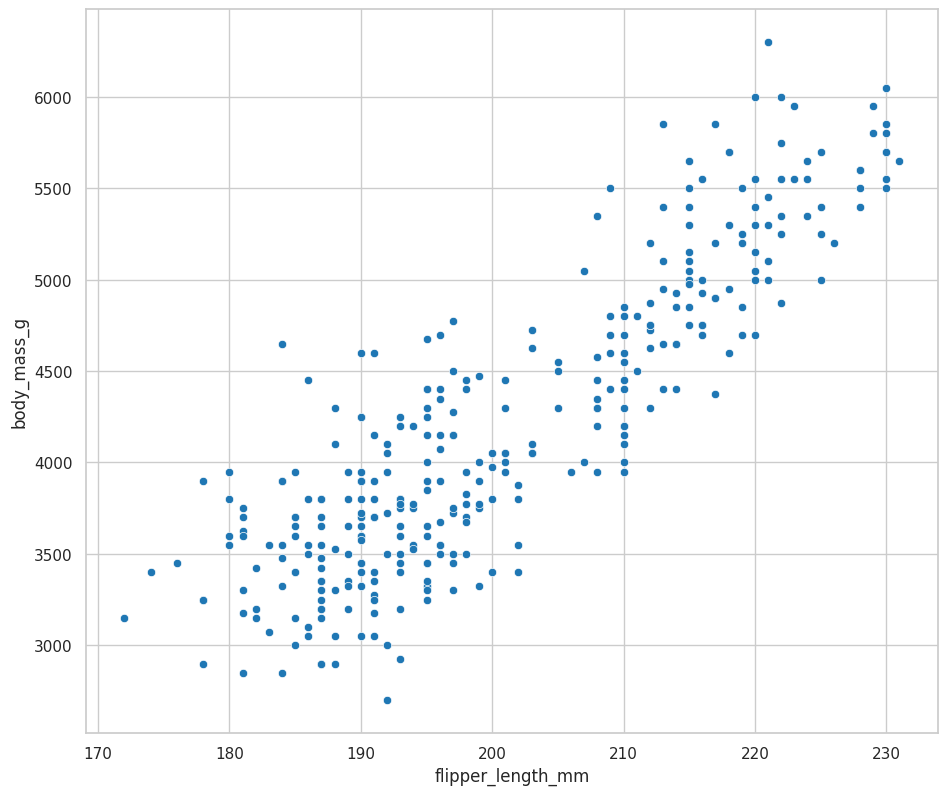

In [ ]:
sns.scatterplot(data=processed_penguins_df, x='flipper_length_mm', y='body_mass_g')
#We see a positive trend between these two variables

## We will now perform a multiple regression analysis to predict the weight of a penguin.

In [ ]:
model = smf.ols(formula = 'body_mass_g ~ bill_depth_mm + flipper_length_mm + C(sex)', data = processed_penguins_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     509.5
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          2.90e-123
Time:                        05:38:03   Log-Likelihood:                -2412.0
No. Observations:                 333   AIC:                             4832.
Df Residuals:                     329   BIC:                             4847.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2246.8293    625.28


* OLS regression model predicting penguin body mass (g)
* R-squared: 0.823 – strong explanatory power
* All predictors are statistically significant (p < 0.001):
* Male penguins weigh ~538g more than females
* Each additional mm in bill depth decreases body mass by ~87g
* Each additional mm in flipper length increases body mass by ~38g
* Residuals show no major issues; slight multicollinearity may be present

## Table of results

In [ ]:
models_results = pd.DataFrame(dict(actual_value = processed_penguins_df.body_mass_g, prediction = result.predict() , species = processed_penguins_df.species, sex = processed_penguins_df.sex))

print(models_results.head(10))

    actual_value   prediction species     sex
0         3750.0  3577.667681  Adelie    male
1         3800.0  3343.566383  Adelie  female
2         3250.0  3635.104887  Adelie  female
4         3450.0  3445.694992  Adelie  female
5         3650.0  3756.175513  Adelie    male
6         3625.0  3117.839656  Adelie  female
7         4675.0  4034.070243  Adelie    male
12        3200.0  3173.418602  Adelie  female
13        3800.0  3742.197123  Adelie    male
14        4400.0  4018.219072  Adelie    male


## Empirical Cumulative Distribution Function (ECDFs)

<Axes: ylabel='Proportion'>

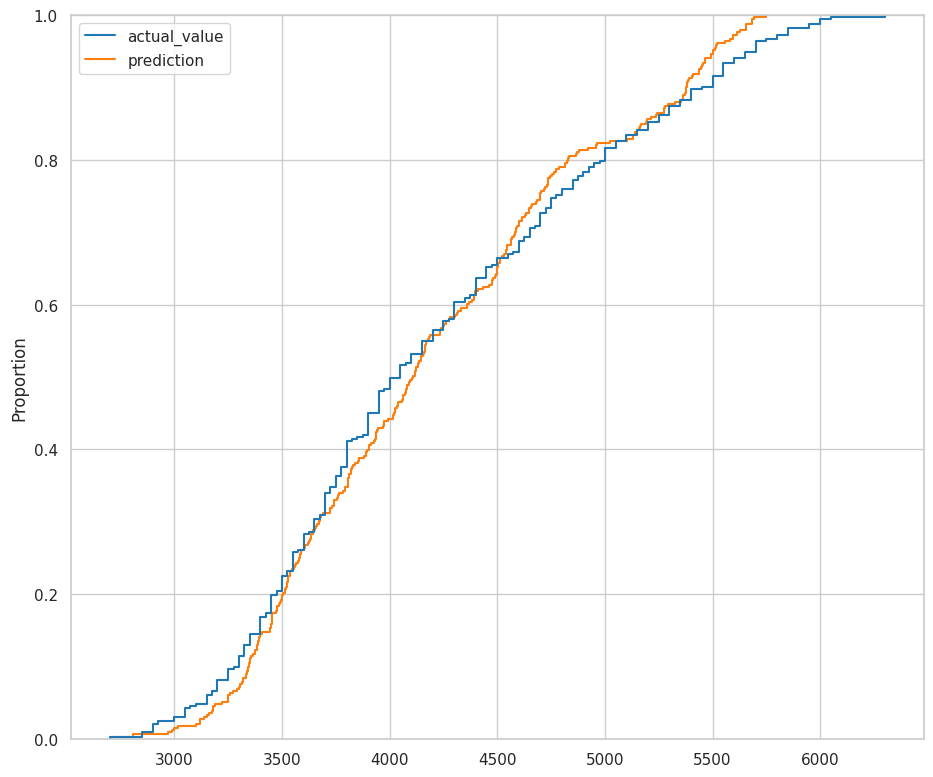

In [ ]:
sns.ecdfplot(data = models_results)

## Probability Density Function (PDFs)

<Axes: ylabel='Density'>

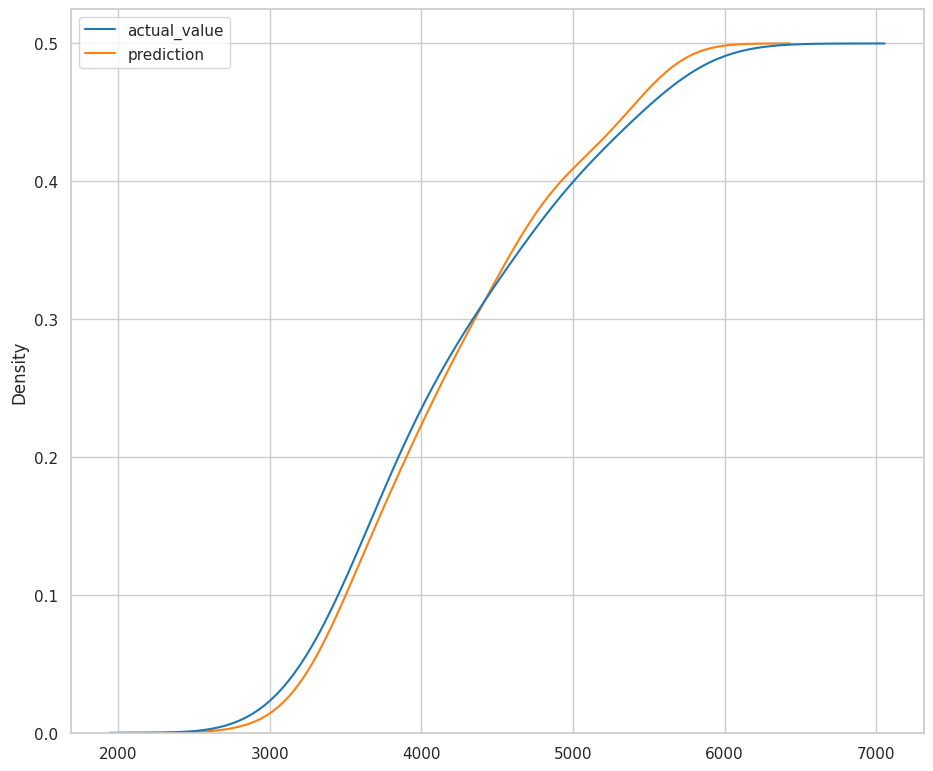

In [ ]:
sns.kdeplot(data = models_results, cumulative = True)

# The model estimates the penguin’s body mass based on species, sex, and physical measurements. The predicted weights are close to the actual values but not exact. Some differences are expected, as the model provides an approximate estimate rather than a perfect match.